In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
G = 6.67430 * (10 ** (-11))
M = 1.9891 * (10 ** (30))
C = 299_792_458

t0 = 0.42
f0 = 128

In [3]:
def calcChirpMass(m1, m2):
    num = (m1*m2) ** (3/5)
    denom = (m1+m2) ** (1/5)
    return ((num/denom) * M)

def calcK(chirpMass):
    k1 = G*chirpMass / (C ** 3)
    k2 = (np.pi ** (8/3))
    return ((96/5) * (k1**(5/3)) * k2)

def calcC(k):
    k1 = (-3/8) * (f0 ** (-8/3))
    return (k1 - k*t0)

def calcFreq(t, m1, m2):
    chirpMass = calcChirpMass(m1, m2)
    k = calcK(chirpMass)
    c = calcC(k)
    k1 = (-3/8) * (k*t + c)
    return (k1 ** (-3/8))

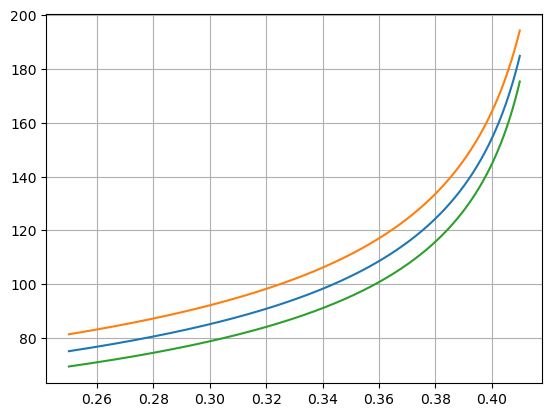

In [4]:
t = np.linspace(0.25, 0.41, 10000)
f1 = calcFreq(t, 36, 29)
f2 = calcFreq(t, 36-4, 29-4)
f3 = calcFreq(t, 36+5, 29+4)

plt.plot(t, f1)
plt.plot(t, f2)
plt.plot(t, f3)
plt.grid()
plt.show()

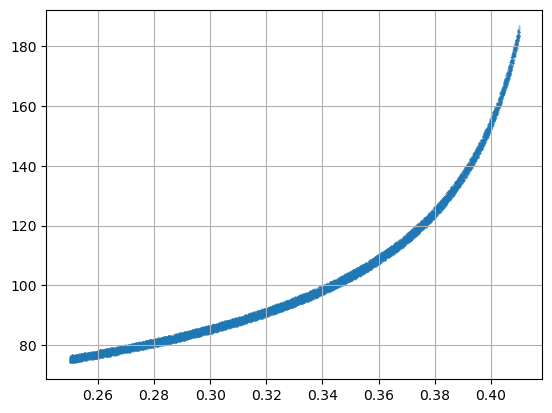

In [5]:
f = 0.8*f1 + 0.2*np.random.uniform(f3, f2)

plt.scatter(t, f, s=0.1)
plt.grid()
plt.show()

In [6]:
def calcAB(x1, y1, x2, y2):
    b = np.log(y2/y1) / (x2-x1)
    a = y2 / np.exp(b*x2)
    return a, b

a, b = calcAB(0.3, 0.05, 0.41, 1)

In [7]:
def calcStrain(t):
    expPart = a * np.exp(b * t)
    sinPart = np.sin(f * t)
    return (expPart * sinPart * (10 ** (-21)))

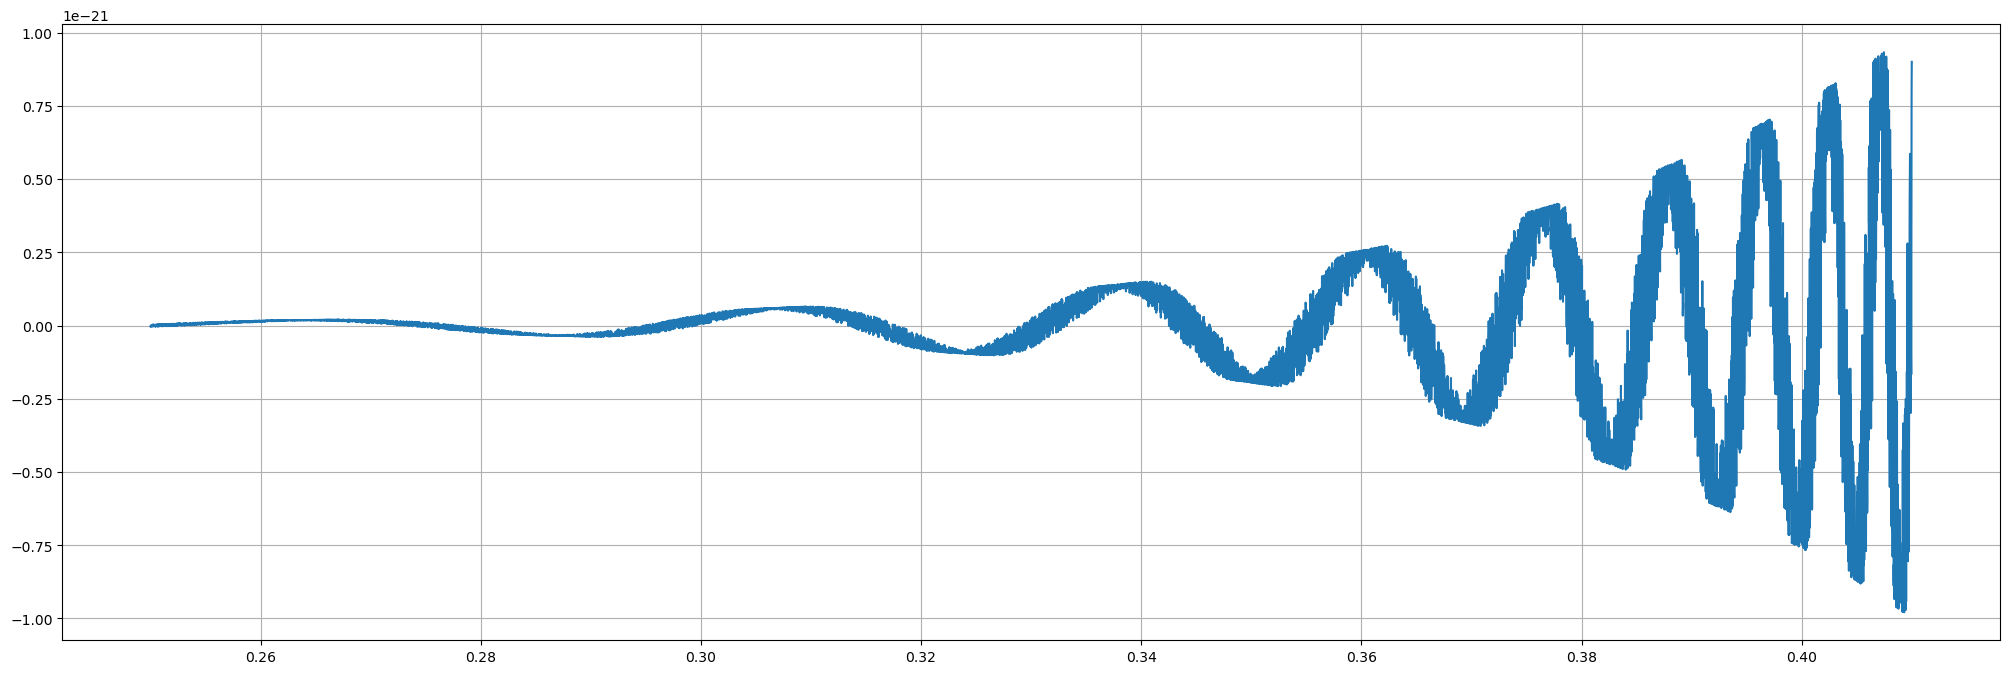

In [8]:
strain = calcStrain(t)

plt.figure(figsize=(25, 8))
plt.plot(t, strain)
plt.grid()
plt.show()

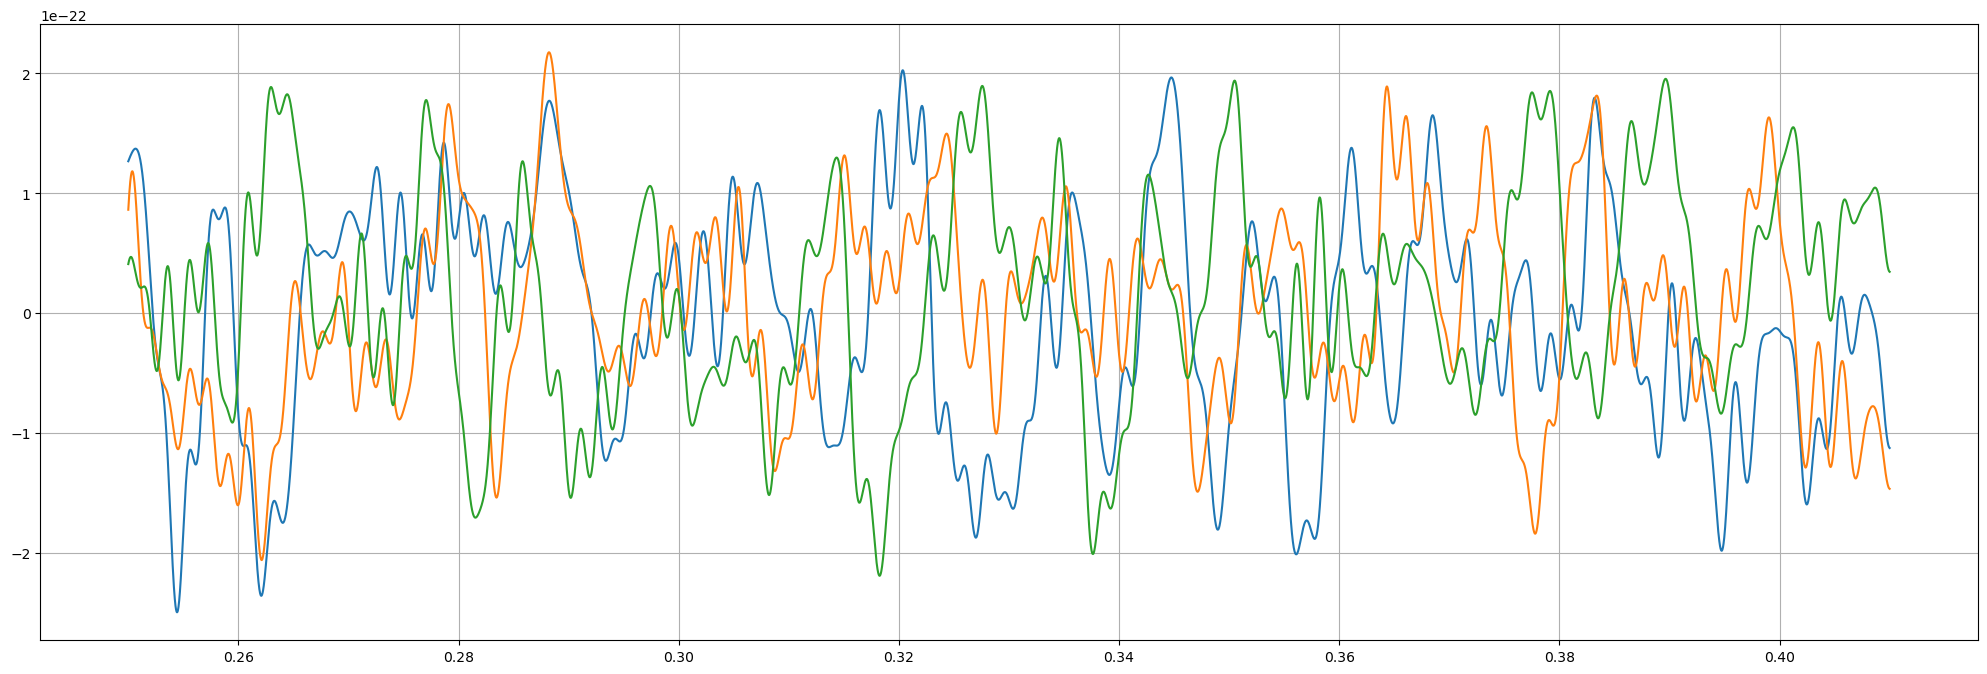

In [9]:
def genNoise(amp, maxFreq):
    freq_power = np.random.uniform(0, 10, maxFreq)
    inv = np.fft.irfft(freq_power, int(len(strain)*2.2))
    slicedInv = inv[int(len(strain)*0.1):int(len(strain)*0.1)+len(strain)]
    invMax = np.max(np.abs(slicedInv))
    normalizedInv = slicedInv / invMax
    noise = amp * normalizedInv * 1e-21
    return noise

noise1 = genNoise(0.2, 50) + genNoise(0.1, 200)
noise2 = genNoise(0.2, 50) + genNoise(0.1, 200)
noise3 = genNoise(0.2, 50) + genNoise(0.1, 200)

plt.figure(figsize=(25, 8))
plt.plot(t, noise1)
plt.plot(t, noise2)
plt.plot(t, noise3)
plt.grid()
plt.show()

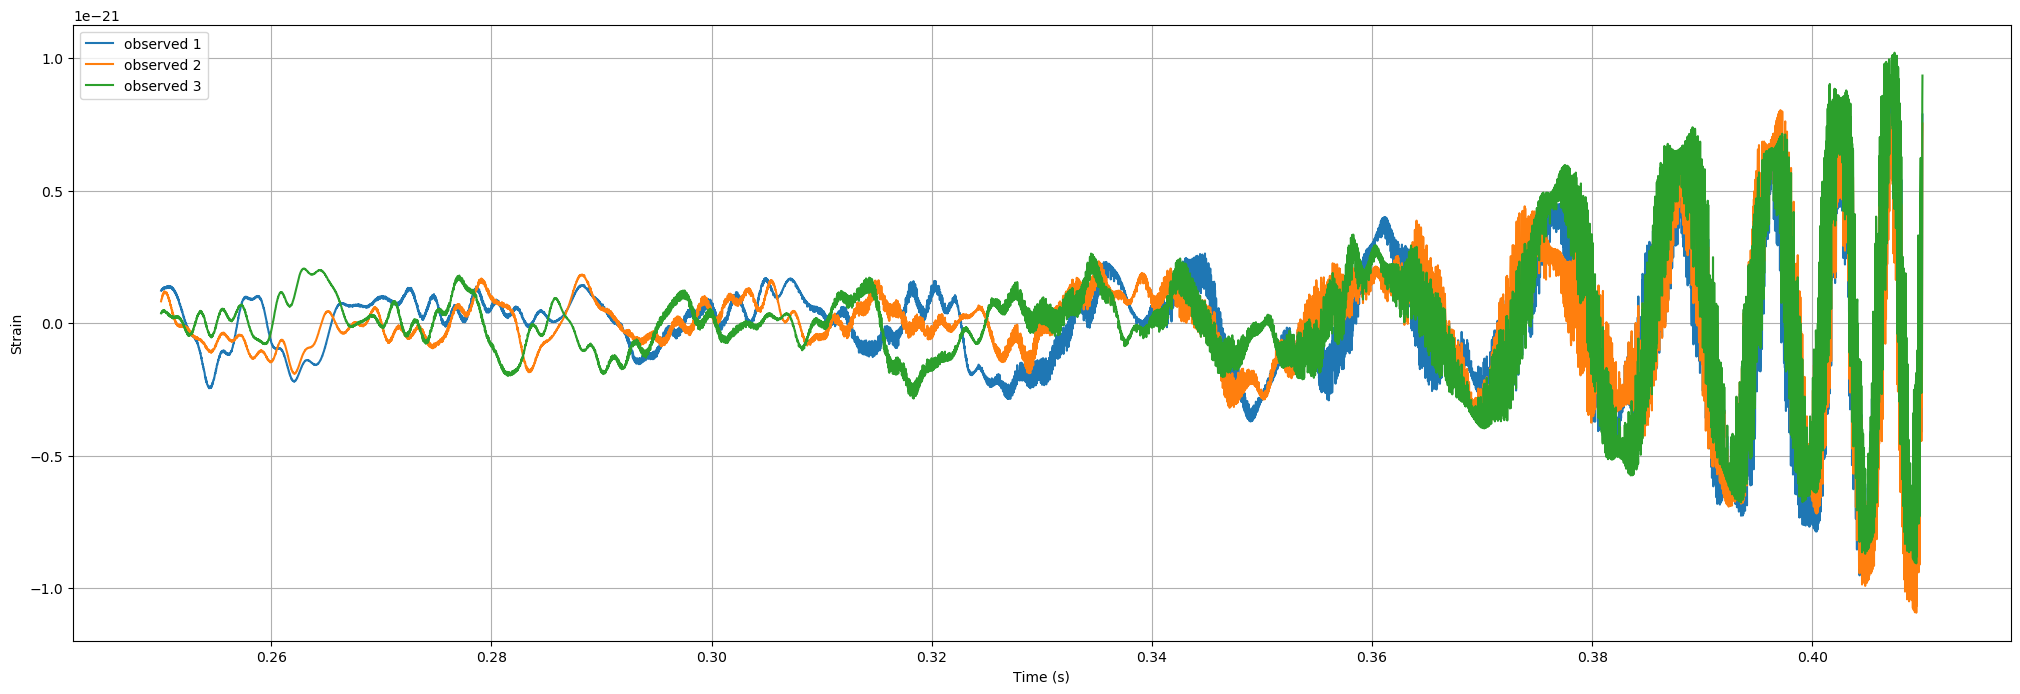

In [10]:
noisyStrain1 = noise1 + strain
noisyStrain2 = noise2 + strain
noisyStrain3 = noise3 + strain

plt.figure(figsize=(25, 8))
plt.plot(t, noisyStrain1, label="observed 1")
plt.plot(t, noisyStrain2, label="observed 2")
plt.plot(t, noisyStrain3, label="observed 3")
plt.ylabel("Strain")
plt.xlabel("Time (s)")
plt.legend()
plt.grid()
plt.show()

In [11]:
t1 = t
t2 = t - 3.1e-3
t3 = t + 8.6e-3

df1 = pd.DataFrame([t1, noisyStrain1]).T
df1.columns = ['time', 'strain']
df2 = pd.DataFrame([t2, noisyStrain2]).T
df2.columns = ['time', 'strain']
df3 = pd.DataFrame([t3, -noisyStrain3]).T
df3.columns = ['time', 'strain']

In [12]:
df1.to_csv('../data/data1.csv', index=None)
df2.to_csv('../data/data2.csv', index=None)
df3.to_csv('../data/data3.csv', index=None)